# logistic model

In [1]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input
# use exiting functions

import numpy as np
import matplotlib.pyplot as plt
import random
from datetime import datetime

import os
import sys
sys.path.append(os.path.abspath('..'))
from rnn_class.util import get_wikipedia_data
from rnn_class.brown import get_sentences_with_word2idx_limit_vocab, get_sentences_with_word2idx

from markov import get_bigram_probs

In [3]:
if __name__ == '__main__':
  # load in the data
  # note: sentences are already converted to sequences of word indexes
  # note: you can limit the vocab size if you run out of memory
  sentences, word2idx = get_sentences_with_word2idx_limit_vocab(2000)
  # sentences, word2idx = get_sentences_with_word2idx()

  # vocab size
  V = len(word2idx)
  print("Vocab size:", V)

  # we will also treat beginning of sentence and end of sentence as bigrams
  # START -> first word
  # last word -> END
  start_idx = word2idx['START']
  end_idx = word2idx['END']


  # a matrix where:
  # row = last word
  # col = current word
  # value at [row, col] = p(current word | last word)
  bigram_probs = get_bigram_probs(sentences, V, start_idx, end_idx, smoothing=0.1)


  # train a logistic model
  W = np.random.randn(V, V) / np.sqrt(V)

  losses = []
  epochs = 1
  lr = 1e-1
  
  def softmax(a):
    a = a - a.max()
    exp_a = np.exp(a)
    return exp_a / exp_a.sum(axis=1, keepdims=True)

  # what is the loss if we set W = log(bigram_probs)?
  W_bigram = np.log(bigram_probs)
  bigram_losses = []


  t0 = datetime.now()
  for epoch in range(epochs):
    # shuffle sentences at each epoch
    random.shuffle(sentences)

    j = 0 # keep track of iterations
    for sentence in sentences:
      # convert sentence into one-hot encoded inputs and targets
      sentence = [start_idx] + sentence + [end_idx]
      n = len(sentence)
      inputs = np.zeros((n - 1, V))
      targets = np.zeros((n - 1, V))
      inputs[np.arange(n - 1), sentence[:n-1]] = 1
      targets[np.arange(n - 1), sentence[1:]] = 1

      # get output predictions
      predictions = softmax(inputs.dot(W))

      # do a gradient descent step
      W = W - lr * inputs.T.dot(predictions - targets)

      # keep track of the loss
      loss = -np.sum(targets * np.log(predictions)) / (n - 1)
      losses.append(loss)

      # keep track of the bigram loss
      # only do it for the first epoch to avoid redundancy
      if epoch == 0:
        bigram_predictions = softmax(inputs.dot(W_bigram))
        bigram_loss = -np.sum(targets * np.log(bigram_predictions)) / (n - 1)
        bigram_losses.append(bigram_loss)


      if j % 10 == 0:
        print("epoch:", epoch, "sentence: %s/%s" % (j, len(sentences)), "loss:", loss)
      j += 1

START inf
END inf
man inf
paris inf
britain inf
england inf
king inf
woman inf
rome inf
london inf
queen inf
italy inf
france inf
the 69971
, 58334
. 49346
of 36412
and 28853
to 26158
a 23195
in 21337
that 10594
is 10109
was 9815
he 9548
for 9489
`` 8837
'' 8789
it 8760
with 7289
as 7253
his 6996
on 6741
be 6377
; 5566
at 5372
by 5306
i 5164
this 5145
had 5133
? 4693
not 4610
are 4394
but 4381
from 4370
or 4206
have 3942
an 3740
they 3620
which 3561
-- 3432
one 3292
you 3286
were 3284
her 3036
all 3001
she 2860
there 2728
would 2714
their 2669
we 2652
him 2619
been 2472
) 2466
has 2437
( 2435
when 2331
who 2252
will 2245
more 2215
if 2198
no 2139
out 2097
so 1985
said 1961
what 1908
up 1890
its 1858
about 1815
: 1795
into 1791
than 1790
them 1788
can 1772
only 1748
other 1702
new 1635
some 1618
could 1601
time 1598
! 1596
these 1573
two 1412
may 1402
then 1380
do 1363
first 1361
any 1344
my 1318
now 1314
such 1303
like 1292
our 1252
over 1236
me 1181
even 1170
most 1159
made 1125
also 

generally 132
association 132
provided 132
led 132
army 132
met 132
influence 132
opened 131
former 131
science 131
student 131
step 131
changes 131
chance 131
husband 131
hot 130
series 130
average 130
works 130
month 130
cause 130
effective 129
george 129
planning 129
systems 129
wouldn't 129
direct 129
soviet 129
stopped 129
wrong 129
lead 129
myself 129
piece 129
theory 129
ask 128
worked 128
freedom 128
organization 128
clearly 128
movement 128
ways 128
press 127
somewhat 127
spring 127
efforts 127
consider 127
meaning 127
bed 127
fear 127
lot 127
treatment 127
beautiful 127
note 127
forms 127
placed 126
hotel 126
truth 126
apparently 125
degree 125
groups 125
he's 125
plant 125
carried 125
wide 125
i've 125
respect 125
man's 125
herself 125
numbers 125
manner 124
reaction 124
easy 124
farm 124
immediately 123
running 123
approach 123
game 123
recently 123
larger 123
lower 123
charge 122
couple 122
de 122
daily 122
eye 122
performance 122
feed 122
oh 122
march 121
persons 121
unde

u. 62
december 62
equally 62
sets 62
please 62
drove 62
arrived 62
save 62
achieved 62
assignment 62
baby 62
guests 62
greatly 62
recognize 62
wilson 62
library 62
careful 62
pleasure 62
cool 62
extreme 62
concerning 62
governments 61
procedures 61
prices 61
duty 61
courses 61
friendly 61
we're 61
r. 61
coast 61
acting 61
50 61
closer 61
speech 61
european 61
showing 61
boston 61
victory 61
beach 61
minister 61
commercial 61
metal 61
possibly 61
tests 61
soft 61
kid 61
vast 61
continuing 61
associated 61
shoulder 61
weapons 61
shore 61
greek 61
travel 61
imagine 61
feelings 61
organizations 61
ideal 61
eat 61
friday 60
keeping 60
heavily 60
armed 60
ended 60
learning 60
text 60
existing 60
scale 60
setting 60
goal 60
task 60
contract 60
garden 60
nose 60
refused 60
streets 60
orchestra 60
contained 60
machinery 60
chemical 60
onto 60
circle 60
slow 60
maintain 60
fat 60
somewhere 60
technique 60
stared 60
moon 60
notice 59
drop 59
budget 59
providing 59
f. 59
formula 59
housing 59
tens

epoch: 0 sentence: 1140/57013 loss: 5.999102434995479
epoch: 0 sentence: 1150/57013 loss: 6.728300762119673
epoch: 0 sentence: 1160/57013 loss: 4.452199355716357
epoch: 0 sentence: 1170/57013 loss: 5.601928043298189
epoch: 0 sentence: 1180/57013 loss: 6.432885624756693
epoch: 0 sentence: 1190/57013 loss: 6.493850319236115
epoch: 0 sentence: 1200/57013 loss: 6.2702107896130554
epoch: 0 sentence: 1210/57013 loss: 5.983892731593801
epoch: 0 sentence: 1220/57013 loss: 7.037423383980617
epoch: 0 sentence: 1230/57013 loss: 5.929637135867563
epoch: 0 sentence: 1240/57013 loss: 6.0609619505011185
epoch: 0 sentence: 1250/57013 loss: 5.664068115859632
epoch: 0 sentence: 1260/57013 loss: 5.360490098198965
epoch: 0 sentence: 1270/57013 loss: 5.744079422588923
epoch: 0 sentence: 1280/57013 loss: 4.893357664612248
epoch: 0 sentence: 1290/57013 loss: 6.825027637161215
epoch: 0 sentence: 1300/57013 loss: 4.726053193644652
epoch: 0 sentence: 1310/57013 loss: 5.815466203366866
epoch: 0 sentence: 1320/57

epoch: 0 sentence: 2660/57013 loss: 6.011988554662036
epoch: 0 sentence: 2670/57013 loss: 3.4773055215387583
epoch: 0 sentence: 2680/57013 loss: 5.676323312333666
epoch: 0 sentence: 2690/57013 loss: 5.86291485420913
epoch: 0 sentence: 2700/57013 loss: 2.403695770168182
epoch: 0 sentence: 2710/57013 loss: 6.7685276481034675
epoch: 0 sentence: 2720/57013 loss: 5.727214623675631
epoch: 0 sentence: 2730/57013 loss: 6.723759580654461
epoch: 0 sentence: 2740/57013 loss: 6.714802826413723
epoch: 0 sentence: 2750/57013 loss: 5.857836662479144
epoch: 0 sentence: 2760/57013 loss: 6.354696928471429
epoch: 0 sentence: 2770/57013 loss: 6.191288358692535
epoch: 0 sentence: 2780/57013 loss: 5.216606309471693
epoch: 0 sentence: 2790/57013 loss: 4.770100477651598
epoch: 0 sentence: 2800/57013 loss: 3.2738694655414613
epoch: 0 sentence: 2810/57013 loss: 5.809056663061873
epoch: 0 sentence: 2820/57013 loss: 4.134619255684057
epoch: 0 sentence: 2830/57013 loss: 4.886663476640279
epoch: 0 sentence: 2840/57

epoch: 0 sentence: 4180/57013 loss: 5.982877748020399
epoch: 0 sentence: 4190/57013 loss: 5.058223936971895
epoch: 0 sentence: 4200/57013 loss: 6.204392229009841
epoch: 0 sentence: 4210/57013 loss: 4.976958531972513
epoch: 0 sentence: 4220/57013 loss: 5.443519795419021
epoch: 0 sentence: 4230/57013 loss: 4.826181596305791
epoch: 0 sentence: 4240/57013 loss: 6.0080646853983035
epoch: 0 sentence: 4250/57013 loss: 6.738707139514881
epoch: 0 sentence: 4260/57013 loss: 5.746644253193265
epoch: 0 sentence: 4270/57013 loss: 5.791875235002963
epoch: 0 sentence: 4280/57013 loss: 4.969514604432139
epoch: 0 sentence: 4290/57013 loss: 4.892544321593786
epoch: 0 sentence: 4300/57013 loss: 4.228770041372807
epoch: 0 sentence: 4310/57013 loss: 3.8032014708123616
epoch: 0 sentence: 4320/57013 loss: 3.485312723025882
epoch: 0 sentence: 4330/57013 loss: 5.6960539349223875
epoch: 0 sentence: 4340/57013 loss: 6.167411871497545
epoch: 0 sentence: 4350/57013 loss: 5.317819224776988
epoch: 0 sentence: 4360/5

epoch: 0 sentence: 5700/57013 loss: 5.558376193085076
epoch: 0 sentence: 5710/57013 loss: 5.230018615266616
epoch: 0 sentence: 5720/57013 loss: 4.993510192358548
epoch: 0 sentence: 5730/57013 loss: 3.780262114293614
epoch: 0 sentence: 5740/57013 loss: 5.908956715476135
epoch: 0 sentence: 5750/57013 loss: 3.9657751564404404
epoch: 0 sentence: 5760/57013 loss: 4.991179372161114
epoch: 0 sentence: 5770/57013 loss: 5.620138874847806
epoch: 0 sentence: 5780/57013 loss: 5.099201379925556
epoch: 0 sentence: 5790/57013 loss: 3.6218526075899256
epoch: 0 sentence: 5800/57013 loss: 5.314153364002512
epoch: 0 sentence: 5810/57013 loss: 6.037305805365808
epoch: 0 sentence: 5820/57013 loss: 5.2559561655303915
epoch: 0 sentence: 5830/57013 loss: 3.5149993950997622
epoch: 0 sentence: 5840/57013 loss: 6.518578264016742
epoch: 0 sentence: 5850/57013 loss: 4.369579940480213
epoch: 0 sentence: 5860/57013 loss: 4.962756350869108
epoch: 0 sentence: 5870/57013 loss: 6.033245625730054
epoch: 0 sentence: 5880/

epoch: 0 sentence: 7220/57013 loss: 4.81079977114148
epoch: 0 sentence: 7230/57013 loss: 2.7453900605641066
epoch: 0 sentence: 7240/57013 loss: 5.264965576172629
epoch: 0 sentence: 7250/57013 loss: 6.114477814531641
epoch: 0 sentence: 7260/57013 loss: 4.448893166925699
epoch: 0 sentence: 7270/57013 loss: 3.462255585851542
epoch: 0 sentence: 7280/57013 loss: 4.629280650998594
epoch: 0 sentence: 7290/57013 loss: 6.162173489219978
epoch: 0 sentence: 7300/57013 loss: 5.362916313666894
epoch: 0 sentence: 7310/57013 loss: 4.811472329199549
epoch: 0 sentence: 7320/57013 loss: 4.979674996559545
epoch: 0 sentence: 7330/57013 loss: 4.032302989243093
epoch: 0 sentence: 7340/57013 loss: 5.1092892739092735
epoch: 0 sentence: 7350/57013 loss: 5.886160021128719
epoch: 0 sentence: 7360/57013 loss: 5.947015916409281
epoch: 0 sentence: 7370/57013 loss: 5.60995606629262
epoch: 0 sentence: 7380/57013 loss: 5.862599833261292
epoch: 0 sentence: 7390/57013 loss: 5.916562907208935
epoch: 0 sentence: 7400/5701

epoch: 0 sentence: 8740/57013 loss: 5.350747259734253
epoch: 0 sentence: 8750/57013 loss: 4.522094201966996
epoch: 0 sentence: 8760/57013 loss: 5.816845522102888
epoch: 0 sentence: 8770/57013 loss: 3.1456916081542077
epoch: 0 sentence: 8780/57013 loss: 4.518110185842437
epoch: 0 sentence: 8790/57013 loss: 4.46916222253944
epoch: 0 sentence: 8800/57013 loss: 5.297176347742938
epoch: 0 sentence: 8810/57013 loss: 4.994010535805112
epoch: 0 sentence: 8820/57013 loss: 4.060454348906713
epoch: 0 sentence: 8830/57013 loss: 5.311469621144211
epoch: 0 sentence: 8840/57013 loss: 4.0068191493795675
epoch: 0 sentence: 8850/57013 loss: 5.664014559709628
epoch: 0 sentence: 8860/57013 loss: 3.883069892245079
epoch: 0 sentence: 8870/57013 loss: 5.851811612494023
epoch: 0 sentence: 8880/57013 loss: 4.481405728627338
epoch: 0 sentence: 8890/57013 loss: 5.595241419102741
epoch: 0 sentence: 8900/57013 loss: 5.188040574980785
epoch: 0 sentence: 8910/57013 loss: 4.920091103677785
epoch: 0 sentence: 8920/570

epoch: 0 sentence: 10260/57013 loss: 4.839264057015974
epoch: 0 sentence: 10270/57013 loss: 5.32307684086159
epoch: 0 sentence: 10280/57013 loss: 3.773871526580365
epoch: 0 sentence: 10290/57013 loss: 4.332414816477422
epoch: 0 sentence: 10300/57013 loss: 4.1116502046508865
epoch: 0 sentence: 10310/57013 loss: 6.613325114654873
epoch: 0 sentence: 10320/57013 loss: 5.340931953314382
epoch: 0 sentence: 10330/57013 loss: 5.500696471780999
epoch: 0 sentence: 10340/57013 loss: 3.9509167918401253
epoch: 0 sentence: 10350/57013 loss: 5.595812537740349
epoch: 0 sentence: 10360/57013 loss: 5.229807485704851
epoch: 0 sentence: 10370/57013 loss: 4.681297628656213
epoch: 0 sentence: 10380/57013 loss: 5.131601639937361
epoch: 0 sentence: 10390/57013 loss: 6.418632850197242
epoch: 0 sentence: 10400/57013 loss: 4.833819013009649
epoch: 0 sentence: 10410/57013 loss: 3.093958545338851
epoch: 0 sentence: 10420/57013 loss: 5.576775633779048
epoch: 0 sentence: 10430/57013 loss: 3.8317606468018504
epoch: 0

epoch: 0 sentence: 11750/57013 loss: 4.071818702126473
epoch: 0 sentence: 11760/57013 loss: 5.7077176455734655
epoch: 0 sentence: 11770/57013 loss: 5.895798762028247
epoch: 0 sentence: 11780/57013 loss: 5.966154578907233
epoch: 0 sentence: 11790/57013 loss: 4.714518033400818
epoch: 0 sentence: 11800/57013 loss: 5.230921423440496
epoch: 0 sentence: 11810/57013 loss: 5.020018316849205
epoch: 0 sentence: 11820/57013 loss: 5.085837597224332
epoch: 0 sentence: 11830/57013 loss: 3.9911905907671743
epoch: 0 sentence: 11840/57013 loss: 4.091282050970538
epoch: 0 sentence: 11850/57013 loss: 5.685118237208305
epoch: 0 sentence: 11860/57013 loss: 3.635229346183324
epoch: 0 sentence: 11870/57013 loss: 4.397755223188143
epoch: 0 sentence: 11880/57013 loss: 4.980336602115551
epoch: 0 sentence: 11890/57013 loss: 4.63188080365631
epoch: 0 sentence: 11900/57013 loss: 5.545771362819672
epoch: 0 sentence: 11910/57013 loss: 5.613904277565412
epoch: 0 sentence: 11920/57013 loss: 3.9052534736743403
epoch: 0

epoch: 0 sentence: 13240/57013 loss: 5.078042790612317
epoch: 0 sentence: 13250/57013 loss: 4.0320301489490324
epoch: 0 sentence: 13260/57013 loss: 4.264823939041045
epoch: 0 sentence: 13270/57013 loss: 5.057967364585924
epoch: 0 sentence: 13280/57013 loss: 4.973454953355393
epoch: 0 sentence: 13290/57013 loss: 5.5868077144324255
epoch: 0 sentence: 13300/57013 loss: 4.4919010154796615
epoch: 0 sentence: 13310/57013 loss: 5.26906913852152
epoch: 0 sentence: 13320/57013 loss: 3.7013952317098595
epoch: 0 sentence: 13330/57013 loss: 4.733154962624514
epoch: 0 sentence: 13340/57013 loss: 5.990557296411212
epoch: 0 sentence: 13350/57013 loss: 4.272816875173559
epoch: 0 sentence: 13360/57013 loss: 4.50021124437162
epoch: 0 sentence: 13370/57013 loss: 6.319441870471798
epoch: 0 sentence: 13380/57013 loss: 3.752560828054383
epoch: 0 sentence: 13390/57013 loss: 2.6802996774575254
epoch: 0 sentence: 13400/57013 loss: 5.342566005925081
epoch: 0 sentence: 13410/57013 loss: 4.515206439404969
epoch: 

epoch: 0 sentence: 14730/57013 loss: 5.532854492435551
epoch: 0 sentence: 14740/57013 loss: 4.976138679826985
epoch: 0 sentence: 14750/57013 loss: 5.448195881254053
epoch: 0 sentence: 14760/57013 loss: 6.215791196900677
epoch: 0 sentence: 14770/57013 loss: 4.511508232452873
epoch: 0 sentence: 14780/57013 loss: 3.949488607511772
epoch: 0 sentence: 14790/57013 loss: 5.02957916341589
epoch: 0 sentence: 14800/57013 loss: 5.509257920392532
epoch: 0 sentence: 14810/57013 loss: 4.233604394697688
epoch: 0 sentence: 14820/57013 loss: 5.7482815059558225
epoch: 0 sentence: 14830/57013 loss: 5.759166941850572
epoch: 0 sentence: 14840/57013 loss: 4.342009481482675
epoch: 0 sentence: 14850/57013 loss: 5.33388755550056
epoch: 0 sentence: 14860/57013 loss: 4.089801929611222
epoch: 0 sentence: 14870/57013 loss: 5.302077709763673
epoch: 0 sentence: 14880/57013 loss: 4.512825758399836
epoch: 0 sentence: 14890/57013 loss: 4.008734708762814
epoch: 0 sentence: 14900/57013 loss: 5.063577446418606
epoch: 0 se

epoch: 0 sentence: 16220/57013 loss: 5.762974935241759
epoch: 0 sentence: 16230/57013 loss: 5.189568048644699
epoch: 0 sentence: 16240/57013 loss: 4.462715509779766
epoch: 0 sentence: 16250/57013 loss: 4.591548224676471
epoch: 0 sentence: 16260/57013 loss: 4.656642249179201
epoch: 0 sentence: 16270/57013 loss: 4.496052064482393
epoch: 0 sentence: 16280/57013 loss: 4.451203038822156
epoch: 0 sentence: 16290/57013 loss: 4.250503302510045
epoch: 0 sentence: 16300/57013 loss: 4.488703740394861
epoch: 0 sentence: 16310/57013 loss: 2.134777566844021
epoch: 0 sentence: 16320/57013 loss: 4.6288235127605795
epoch: 0 sentence: 16330/57013 loss: 4.067313369065359
epoch: 0 sentence: 16340/57013 loss: 5.235715290677851
epoch: 0 sentence: 16350/57013 loss: 5.410912274910554
epoch: 0 sentence: 16360/57013 loss: 4.807912396192569
epoch: 0 sentence: 16370/57013 loss: 5.232008314890333
epoch: 0 sentence: 16380/57013 loss: 4.74350610848006
epoch: 0 sentence: 16390/57013 loss: 5.527122822328741
epoch: 0 s

epoch: 0 sentence: 17710/57013 loss: 2.2058861997162587
epoch: 0 sentence: 17720/57013 loss: 4.920105849952462
epoch: 0 sentence: 17730/57013 loss: 3.9359988006854434
epoch: 0 sentence: 17740/57013 loss: 4.1183973331656984
epoch: 0 sentence: 17750/57013 loss: 5.06406075235925
epoch: 0 sentence: 17760/57013 loss: 4.3428842816818
epoch: 0 sentence: 17770/57013 loss: 5.059565551839946
epoch: 0 sentence: 17780/57013 loss: 4.624975584621017
epoch: 0 sentence: 17790/57013 loss: 4.45543338161835
epoch: 0 sentence: 17800/57013 loss: 6.066824692110523
epoch: 0 sentence: 17810/57013 loss: 4.801519335736901
epoch: 0 sentence: 17820/57013 loss: 3.3983588448999438
epoch: 0 sentence: 17830/57013 loss: 4.175596715523704
epoch: 0 sentence: 17840/57013 loss: 4.920816430045615
epoch: 0 sentence: 17850/57013 loss: 7.7997251561729355
epoch: 0 sentence: 17860/57013 loss: 4.172454586668412
epoch: 0 sentence: 17870/57013 loss: 5.30149814240397
epoch: 0 sentence: 17880/57013 loss: 6.357575443247956
epoch: 0 s

epoch: 0 sentence: 19200/57013 loss: 2.790137188333368
epoch: 0 sentence: 19210/57013 loss: 4.013006059147172
epoch: 0 sentence: 19220/57013 loss: 3.5682787717544455
epoch: 0 sentence: 19230/57013 loss: 1.4857815056264316
epoch: 0 sentence: 19240/57013 loss: 5.593494514022612
epoch: 0 sentence: 19250/57013 loss: 5.271732378588734
epoch: 0 sentence: 19260/57013 loss: 3.6062776643180245
epoch: 0 sentence: 19270/57013 loss: 4.791452838343743
epoch: 0 sentence: 19280/57013 loss: 5.705805808118679
epoch: 0 sentence: 19290/57013 loss: 4.715942477860951
epoch: 0 sentence: 19300/57013 loss: 3.21722130715904
epoch: 0 sentence: 19310/57013 loss: 4.195270936338336
epoch: 0 sentence: 19320/57013 loss: 3.898108036489255
epoch: 0 sentence: 19330/57013 loss: 5.343573787426888
epoch: 0 sentence: 19340/57013 loss: 2.777822999913658
epoch: 0 sentence: 19350/57013 loss: 5.301214582691401
epoch: 0 sentence: 19360/57013 loss: 5.408808550940386
epoch: 0 sentence: 19370/57013 loss: 4.204953455518964
epoch: 0

epoch: 0 sentence: 20690/57013 loss: 4.857634932723687
epoch: 0 sentence: 20700/57013 loss: 4.276580931138491
epoch: 0 sentence: 20710/57013 loss: 5.107418249593721
epoch: 0 sentence: 20720/57013 loss: 4.745102697965249
epoch: 0 sentence: 20730/57013 loss: 5.536262973406408
epoch: 0 sentence: 20740/57013 loss: 2.6871110889262684
epoch: 0 sentence: 20750/57013 loss: 5.233016489489572
epoch: 0 sentence: 20760/57013 loss: 4.453923526596751
epoch: 0 sentence: 20770/57013 loss: 5.428040708803347
epoch: 0 sentence: 20780/57013 loss: 3.6385383247964365
epoch: 0 sentence: 20790/57013 loss: 6.324169904017256
epoch: 0 sentence: 20800/57013 loss: 4.582183463387649
epoch: 0 sentence: 20810/57013 loss: 4.137252508293958
epoch: 0 sentence: 20820/57013 loss: 4.304119268559565
epoch: 0 sentence: 20830/57013 loss: 4.798688727157377
epoch: 0 sentence: 20840/57013 loss: 4.957864014746596
epoch: 0 sentence: 20850/57013 loss: 4.994010809382685
epoch: 0 sentence: 20860/57013 loss: 3.3080088986847986
epoch: 

epoch: 0 sentence: 22180/57013 loss: 5.25492077729277
epoch: 0 sentence: 22190/57013 loss: 4.1810769955412495
epoch: 0 sentence: 22200/57013 loss: 6.129453085147703
epoch: 0 sentence: 22210/57013 loss: 4.032513649344265
epoch: 0 sentence: 22220/57013 loss: 5.882325152454343
epoch: 0 sentence: 22230/57013 loss: 6.490565647941602
epoch: 0 sentence: 22240/57013 loss: 5.2146121622934505
epoch: 0 sentence: 22250/57013 loss: 5.701254139728552
epoch: 0 sentence: 22260/57013 loss: 5.623215889434832
epoch: 0 sentence: 22270/57013 loss: 5.464129529546989
epoch: 0 sentence: 22280/57013 loss: 4.350578199083987
epoch: 0 sentence: 22290/57013 loss: 1.7785532092471328
epoch: 0 sentence: 22300/57013 loss: 5.431479485845624
epoch: 0 sentence: 22310/57013 loss: 3.988413186220201
epoch: 0 sentence: 22320/57013 loss: 4.324083771208235
epoch: 0 sentence: 22330/57013 loss: 5.056846659754422
epoch: 0 sentence: 22340/57013 loss: 4.8210726454282264
epoch: 0 sentence: 22350/57013 loss: 6.6184138701186335
epoch:

epoch: 0 sentence: 23670/57013 loss: 5.512809880797647
epoch: 0 sentence: 23680/57013 loss: 2.7009234640116864
epoch: 0 sentence: 23690/57013 loss: 6.269721258510852
epoch: 0 sentence: 23700/57013 loss: 5.63107360483057
epoch: 0 sentence: 23710/57013 loss: 5.677658826589159
epoch: 0 sentence: 23720/57013 loss: 4.8570287883693455
epoch: 0 sentence: 23730/57013 loss: 2.3018817177562023
epoch: 0 sentence: 23740/57013 loss: 2.476391789065016
epoch: 0 sentence: 23750/57013 loss: 5.29177060139602
epoch: 0 sentence: 23760/57013 loss: 3.632603996527672
epoch: 0 sentence: 23770/57013 loss: 4.162531172155832
epoch: 0 sentence: 23780/57013 loss: 5.810333645008006
epoch: 0 sentence: 23790/57013 loss: 4.759248616832872
epoch: 0 sentence: 23800/57013 loss: 4.608760554965918
epoch: 0 sentence: 23810/57013 loss: 5.500220106181077
epoch: 0 sentence: 23820/57013 loss: 4.874137759490939
epoch: 0 sentence: 23830/57013 loss: 4.37535650940929
epoch: 0 sentence: 23840/57013 loss: 5.165068211812695
epoch: 0 s

epoch: 0 sentence: 25160/57013 loss: 4.1581024719679585
epoch: 0 sentence: 25170/57013 loss: 3.664098402357368
epoch: 0 sentence: 25180/57013 loss: 4.870506704604789
epoch: 0 sentence: 25190/57013 loss: 4.361130599223164
epoch: 0 sentence: 25200/57013 loss: 2.9523932930964962
epoch: 0 sentence: 25210/57013 loss: 5.717389742707396
epoch: 0 sentence: 25220/57013 loss: 4.775689323624447
epoch: 0 sentence: 25230/57013 loss: 5.103924041187052
epoch: 0 sentence: 25240/57013 loss: 5.377525705728537
epoch: 0 sentence: 25250/57013 loss: 3.599803922925304
epoch: 0 sentence: 25260/57013 loss: 2.0370809678951503
epoch: 0 sentence: 25270/57013 loss: 3.7825685210055435
epoch: 0 sentence: 25280/57013 loss: 3.978139979497716
epoch: 0 sentence: 25290/57013 loss: 5.252411910770813
epoch: 0 sentence: 25300/57013 loss: 4.652350620314638
epoch: 0 sentence: 25310/57013 loss: 4.394701941996444
epoch: 0 sentence: 25320/57013 loss: 4.270070735784969
epoch: 0 sentence: 25330/57013 loss: 2.2806354275676517
epoch

epoch: 0 sentence: 26650/57013 loss: 4.355975374459423
epoch: 0 sentence: 26660/57013 loss: 2.7948809712280904
epoch: 0 sentence: 26670/57013 loss: 5.664596488543569
epoch: 0 sentence: 26680/57013 loss: 5.3012704443069225
epoch: 0 sentence: 26690/57013 loss: 6.107242800838056
epoch: 0 sentence: 26700/57013 loss: 3.8148162814566495
epoch: 0 sentence: 26710/57013 loss: 4.614093632938308
epoch: 0 sentence: 26720/57013 loss: 5.390440570022909
epoch: 0 sentence: 26730/57013 loss: 4.715062844609237
epoch: 0 sentence: 26740/57013 loss: 3.2906351825021605
epoch: 0 sentence: 26750/57013 loss: 5.50049619613239
epoch: 0 sentence: 26760/57013 loss: 4.710883614422259
epoch: 0 sentence: 26770/57013 loss: 5.472978476005362
epoch: 0 sentence: 26780/57013 loss: 4.96326211487744
epoch: 0 sentence: 26790/57013 loss: 5.810981013863667
epoch: 0 sentence: 26800/57013 loss: 5.092551068593591
epoch: 0 sentence: 26810/57013 loss: 5.219066025463203
epoch: 0 sentence: 26820/57013 loss: 4.920430338823506
epoch: 0

epoch: 0 sentence: 28140/57013 loss: 5.325650336204166
epoch: 0 sentence: 28150/57013 loss: 4.277195679801221
epoch: 0 sentence: 28160/57013 loss: 5.381408659822027
epoch: 0 sentence: 28170/57013 loss: 2.389530905669907
epoch: 0 sentence: 28180/57013 loss: 3.865099854565539
epoch: 0 sentence: 28190/57013 loss: 4.764307586081289
epoch: 0 sentence: 28200/57013 loss: 4.794908962237327
epoch: 0 sentence: 28210/57013 loss: 4.7453993852281835
epoch: 0 sentence: 28220/57013 loss: 4.8863841709057345
epoch: 0 sentence: 28230/57013 loss: 5.000900283970679
epoch: 0 sentence: 28240/57013 loss: 4.548236323498774
epoch: 0 sentence: 28250/57013 loss: 2.6816068837992213
epoch: 0 sentence: 28260/57013 loss: 5.575074375649568
epoch: 0 sentence: 28270/57013 loss: 3.1763519905216318
epoch: 0 sentence: 28280/57013 loss: 3.464040546449742
epoch: 0 sentence: 28290/57013 loss: 5.404050246620561
epoch: 0 sentence: 28300/57013 loss: 2.7856137930345284
epoch: 0 sentence: 28310/57013 loss: 5.446996960231816
epoch

epoch: 0 sentence: 29630/57013 loss: 4.735050400994456
epoch: 0 sentence: 29640/57013 loss: 4.004040669777214
epoch: 0 sentence: 29650/57013 loss: 4.938395263871053
epoch: 0 sentence: 29660/57013 loss: 4.792766722510582
epoch: 0 sentence: 29670/57013 loss: 4.636588276931445
epoch: 0 sentence: 29680/57013 loss: 6.069153314629696
epoch: 0 sentence: 29690/57013 loss: 3.213093392240213
epoch: 0 sentence: 29700/57013 loss: 4.4217252066240995
epoch: 0 sentence: 29710/57013 loss: 5.475513078638687
epoch: 0 sentence: 29720/57013 loss: 4.9153976072818555
epoch: 0 sentence: 29730/57013 loss: 5.567052722470137
epoch: 0 sentence: 29740/57013 loss: 4.577376431355071
epoch: 0 sentence: 29750/57013 loss: 4.645529628968308
epoch: 0 sentence: 29760/57013 loss: 4.7378912272872835
epoch: 0 sentence: 29770/57013 loss: 5.433840239906848
epoch: 0 sentence: 29780/57013 loss: 6.229507475041128
epoch: 0 sentence: 29790/57013 loss: 4.642175496486816
epoch: 0 sentence: 29800/57013 loss: 6.376714232157047
epoch: 

epoch: 0 sentence: 31120/57013 loss: 4.044921843651019
epoch: 0 sentence: 31130/57013 loss: 4.6631207787985725
epoch: 0 sentence: 31140/57013 loss: 4.412911220493148
epoch: 0 sentence: 31150/57013 loss: 3.7796280858676212
epoch: 0 sentence: 31160/57013 loss: 3.901803704758368
epoch: 0 sentence: 31170/57013 loss: 4.445500603582985
epoch: 0 sentence: 31180/57013 loss: 4.819346099270238
epoch: 0 sentence: 31190/57013 loss: 4.359819868202786
epoch: 0 sentence: 31200/57013 loss: 4.881538184155665
epoch: 0 sentence: 31210/57013 loss: 5.084403776639093
epoch: 0 sentence: 31220/57013 loss: 4.693283124484022
epoch: 0 sentence: 31230/57013 loss: 5.032368183340768
epoch: 0 sentence: 31240/57013 loss: 4.60010856740501
epoch: 0 sentence: 31250/57013 loss: 4.827386668467208
epoch: 0 sentence: 31260/57013 loss: 4.063604006257423
epoch: 0 sentence: 31270/57013 loss: 3.557251310859084
epoch: 0 sentence: 31280/57013 loss: 5.143476774075534
epoch: 0 sentence: 31290/57013 loss: 5.418766960718531
epoch: 0 

epoch: 0 sentence: 32610/57013 loss: 2.194132807886102
epoch: 0 sentence: 32620/57013 loss: 4.59111568210777
epoch: 0 sentence: 32630/57013 loss: 4.711848802072025
epoch: 0 sentence: 32640/57013 loss: 4.692469636370992
epoch: 0 sentence: 32650/57013 loss: 5.362056951678561
epoch: 0 sentence: 32660/57013 loss: 4.61209133571857
epoch: 0 sentence: 32670/57013 loss: 5.373378472701903
epoch: 0 sentence: 32680/57013 loss: 3.293228381831647
epoch: 0 sentence: 32690/57013 loss: 4.978640778753359
epoch: 0 sentence: 32700/57013 loss: 4.609780695844935
epoch: 0 sentence: 32710/57013 loss: 3.538994458935496
epoch: 0 sentence: 32720/57013 loss: 3.746315489110215
epoch: 0 sentence: 32730/57013 loss: 4.7049909646515236
epoch: 0 sentence: 32740/57013 loss: 6.120628712095038
epoch: 0 sentence: 32750/57013 loss: 5.142251006324072
epoch: 0 sentence: 32760/57013 loss: 5.147799746514764
epoch: 0 sentence: 32770/57013 loss: 3.960764068866637
epoch: 0 sentence: 32780/57013 loss: 4.512806875486245
epoch: 0 se

epoch: 0 sentence: 34100/57013 loss: 4.611347199153831
epoch: 0 sentence: 34110/57013 loss: 4.367688603418492
epoch: 0 sentence: 34120/57013 loss: 5.367865903202322
epoch: 0 sentence: 34130/57013 loss: 2.744842322927807
epoch: 0 sentence: 34140/57013 loss: 4.664992480917866
epoch: 0 sentence: 34150/57013 loss: 3.814235906058972
epoch: 0 sentence: 34160/57013 loss: 5.195163177319111
epoch: 0 sentence: 34170/57013 loss: 4.842691293710601
epoch: 0 sentence: 34180/57013 loss: 3.1787366333326825
epoch: 0 sentence: 34190/57013 loss: 2.8105313524634976
epoch: 0 sentence: 34200/57013 loss: 5.469038403010622
epoch: 0 sentence: 34210/57013 loss: 5.401437898014425
epoch: 0 sentence: 34220/57013 loss: 4.490869285470319
epoch: 0 sentence: 34230/57013 loss: 3.87653406737653
epoch: 0 sentence: 34240/57013 loss: 4.838755720525387
epoch: 0 sentence: 34250/57013 loss: 5.543635935582216
epoch: 0 sentence: 34260/57013 loss: 4.709608358343507
epoch: 0 sentence: 34270/57013 loss: 4.850351725746052
epoch: 0 

epoch: 0 sentence: 35590/57013 loss: 4.688860704466088
epoch: 0 sentence: 35600/57013 loss: 4.060660634992011
epoch: 0 sentence: 35610/57013 loss: 3.0064965268161212
epoch: 0 sentence: 35620/57013 loss: 3.5242740374440658
epoch: 0 sentence: 35630/57013 loss: 5.770957907950124
epoch: 0 sentence: 35640/57013 loss: 4.912923506637034
epoch: 0 sentence: 35650/57013 loss: 4.863570213649466
epoch: 0 sentence: 35660/57013 loss: 4.250082299220491
epoch: 0 sentence: 35670/57013 loss: 4.355375196803268
epoch: 0 sentence: 35680/57013 loss: 2.8829779748900535
epoch: 0 sentence: 35690/57013 loss: 5.4270508410656735
epoch: 0 sentence: 35700/57013 loss: 3.6982767070855047
epoch: 0 sentence: 35710/57013 loss: 4.802570540677343
epoch: 0 sentence: 35720/57013 loss: 4.36466405285467
epoch: 0 sentence: 35730/57013 loss: 3.4444086291575866
epoch: 0 sentence: 35740/57013 loss: 4.681662375397892
epoch: 0 sentence: 35750/57013 loss: 4.943532668800947
epoch: 0 sentence: 35760/57013 loss: 4.693111524290652
epoch

epoch: 0 sentence: 37080/57013 loss: 2.8586785880415464
epoch: 0 sentence: 37090/57013 loss: 4.6852311428538105
epoch: 0 sentence: 37100/57013 loss: 3.9349243575578683
epoch: 0 sentence: 37110/57013 loss: 5.511772323990172
epoch: 0 sentence: 37120/57013 loss: 5.175270958592924
epoch: 0 sentence: 37130/57013 loss: 4.39364448508279
epoch: 0 sentence: 37140/57013 loss: 4.387081225820098
epoch: 0 sentence: 37150/57013 loss: 4.022408911923704
epoch: 0 sentence: 37160/57013 loss: 4.5663253915784985
epoch: 0 sentence: 37170/57013 loss: 4.81851694939828
epoch: 0 sentence: 37180/57013 loss: 3.3880732324647944
epoch: 0 sentence: 37190/57013 loss: 5.514331270903121
epoch: 0 sentence: 37200/57013 loss: 5.0030437208386465
epoch: 0 sentence: 37210/57013 loss: 4.404925589253902
epoch: 0 sentence: 37220/57013 loss: 5.092016926019425
epoch: 0 sentence: 37230/57013 loss: 5.6696040261499006
epoch: 0 sentence: 37240/57013 loss: 4.536386686528327
epoch: 0 sentence: 37250/57013 loss: 4.897995270018294
epoch

epoch: 0 sentence: 38570/57013 loss: 3.895107453238098
epoch: 0 sentence: 38580/57013 loss: 2.6521739365029844
epoch: 0 sentence: 38590/57013 loss: 4.278927983713666
epoch: 0 sentence: 38600/57013 loss: 4.669014607468382
epoch: 0 sentence: 38610/57013 loss: 5.423737791742741
epoch: 0 sentence: 38620/57013 loss: 4.337303314178589
epoch: 0 sentence: 38630/57013 loss: 5.340923125129263
epoch: 0 sentence: 38640/57013 loss: 5.356251418606116
epoch: 0 sentence: 38650/57013 loss: 3.777196282847605
epoch: 0 sentence: 38660/57013 loss: 4.499413554447089
epoch: 0 sentence: 38670/57013 loss: 3.988450130577285
epoch: 0 sentence: 38680/57013 loss: 5.191617201754727
epoch: 0 sentence: 38690/57013 loss: 3.579822469121058
epoch: 0 sentence: 38700/57013 loss: 4.234623329749182
epoch: 0 sentence: 38710/57013 loss: 5.297307430572822
epoch: 0 sentence: 38720/57013 loss: 4.645664787058583
epoch: 0 sentence: 38730/57013 loss: 4.225587704569099
epoch: 0 sentence: 38740/57013 loss: 5.026396772554731
epoch: 0 

epoch: 0 sentence: 40060/57013 loss: 3.808879893683462
epoch: 0 sentence: 40070/57013 loss: 4.480420364417412
epoch: 0 sentence: 40080/57013 loss: 4.526927957794959
epoch: 0 sentence: 40090/57013 loss: 3.631557540168859
epoch: 0 sentence: 40100/57013 loss: 3.7412209600763404
epoch: 0 sentence: 40110/57013 loss: 4.154235662529362
epoch: 0 sentence: 40120/57013 loss: 4.190097819017213
epoch: 0 sentence: 40130/57013 loss: 5.5107600031769755
epoch: 0 sentence: 40140/57013 loss: 3.523946584926629
epoch: 0 sentence: 40150/57013 loss: 3.902244910594691
epoch: 0 sentence: 40160/57013 loss: 4.515946814034439
epoch: 0 sentence: 40170/57013 loss: 4.736334409965802
epoch: 0 sentence: 40180/57013 loss: 5.301336836921541
epoch: 0 sentence: 40190/57013 loss: 3.658505569487953
epoch: 0 sentence: 40200/57013 loss: 2.0563037362191623
epoch: 0 sentence: 40210/57013 loss: 5.8173564444477535
epoch: 0 sentence: 40220/57013 loss: 3.735456540687991
epoch: 0 sentence: 40230/57013 loss: 5.460501129901498
epoch:

epoch: 0 sentence: 41550/57013 loss: 4.349393925523386
epoch: 0 sentence: 41560/57013 loss: 4.787776125277199
epoch: 0 sentence: 41570/57013 loss: 2.811432438448955
epoch: 0 sentence: 41580/57013 loss: 4.461059607547688
epoch: 0 sentence: 41590/57013 loss: 4.564950273314072
epoch: 0 sentence: 41600/57013 loss: 4.863954514691155
epoch: 0 sentence: 41610/57013 loss: 3.477452238129043
epoch: 0 sentence: 41620/57013 loss: 5.07088770024008
epoch: 0 sentence: 41630/57013 loss: 4.78286021160872
epoch: 0 sentence: 41640/57013 loss: 4.47523332913943
epoch: 0 sentence: 41650/57013 loss: 4.564991207514321
epoch: 0 sentence: 41660/57013 loss: 5.015269362980757
epoch: 0 sentence: 41670/57013 loss: 4.534366656047027
epoch: 0 sentence: 41680/57013 loss: 4.876436915162361
epoch: 0 sentence: 41690/57013 loss: 4.77282684340645
epoch: 0 sentence: 41700/57013 loss: 3.9068960799627783
epoch: 0 sentence: 41710/57013 loss: 3.731441483102732
epoch: 0 sentence: 41720/57013 loss: 5.119304961545675
epoch: 0 sent

epoch: 0 sentence: 43040/57013 loss: 5.211885450103458
epoch: 0 sentence: 43050/57013 loss: 4.712436285832532
epoch: 0 sentence: 43060/57013 loss: 4.315891417558277
epoch: 0 sentence: 43070/57013 loss: 3.2364424858266316
epoch: 0 sentence: 43080/57013 loss: 4.0425698260392995
epoch: 0 sentence: 43090/57013 loss: 3.668478899095423
epoch: 0 sentence: 43100/57013 loss: 4.325951174401349
epoch: 0 sentence: 43110/57013 loss: 6.439902287917835
epoch: 0 sentence: 43120/57013 loss: 3.821787915262613
epoch: 0 sentence: 43130/57013 loss: 4.157629218721694
epoch: 0 sentence: 43140/57013 loss: 5.33119695277123
epoch: 0 sentence: 43150/57013 loss: 4.036248867486479
epoch: 0 sentence: 43160/57013 loss: 4.415797668899276
epoch: 0 sentence: 43170/57013 loss: 5.184310233382724
epoch: 0 sentence: 43180/57013 loss: 4.324341693155599
epoch: 0 sentence: 43190/57013 loss: 4.8107705994235745
epoch: 0 sentence: 43200/57013 loss: 4.449597336780341
epoch: 0 sentence: 43210/57013 loss: 5.896124404808678
epoch: 0

epoch: 0 sentence: 44530/57013 loss: 5.3494545135395795
epoch: 0 sentence: 44540/57013 loss: 4.645449388415782
epoch: 0 sentence: 44550/57013 loss: 4.921505255922116
epoch: 0 sentence: 44560/57013 loss: 4.076796452340476
epoch: 0 sentence: 44570/57013 loss: 5.362162741505095
epoch: 0 sentence: 44580/57013 loss: 4.489628748349251
epoch: 0 sentence: 44590/57013 loss: 5.417750133602661
epoch: 0 sentence: 44600/57013 loss: 3.2182513433233217
epoch: 0 sentence: 44610/57013 loss: 4.400201069738279
epoch: 0 sentence: 44620/57013 loss: 6.453646335351733
epoch: 0 sentence: 44630/57013 loss: 5.211660797534847
epoch: 0 sentence: 44640/57013 loss: 5.071123111073214
epoch: 0 sentence: 44650/57013 loss: 5.075847239761789
epoch: 0 sentence: 44660/57013 loss: 6.179627097828176
epoch: 0 sentence: 44670/57013 loss: 2.5763984940754905
epoch: 0 sentence: 44680/57013 loss: 4.787637383013825
epoch: 0 sentence: 44690/57013 loss: 5.779879276306113
epoch: 0 sentence: 44700/57013 loss: 4.826433383901622
epoch: 

epoch: 0 sentence: 46020/57013 loss: 5.277680454140203
epoch: 0 sentence: 46030/57013 loss: 4.700285403498832
epoch: 0 sentence: 46040/57013 loss: 4.470285913581851
epoch: 0 sentence: 46050/57013 loss: 3.926290199189148
epoch: 0 sentence: 46060/57013 loss: 4.4005785961124175
epoch: 0 sentence: 46070/57013 loss: 4.961425107112693
epoch: 0 sentence: 46080/57013 loss: 4.048752699666642
epoch: 0 sentence: 46090/57013 loss: 5.251434074277362
epoch: 0 sentence: 46100/57013 loss: 3.7103820298535406
epoch: 0 sentence: 46110/57013 loss: 5.6939251368032275
epoch: 0 sentence: 46120/57013 loss: 3.5234693297168813
epoch: 0 sentence: 46130/57013 loss: 4.851567826219553
epoch: 0 sentence: 46140/57013 loss: 4.601434178010687
epoch: 0 sentence: 46150/57013 loss: 3.795791040602213
epoch: 0 sentence: 46160/57013 loss: 2.8065696492020558
epoch: 0 sentence: 46170/57013 loss: 5.255600348644571
epoch: 0 sentence: 46180/57013 loss: 4.300309737940397
epoch: 0 sentence: 46190/57013 loss: 2.8031283713959136
epoc

epoch: 0 sentence: 47510/57013 loss: 2.768357284014503
epoch: 0 sentence: 47520/57013 loss: 4.378592642125208
epoch: 0 sentence: 47530/57013 loss: 4.051077245006304
epoch: 0 sentence: 47540/57013 loss: 5.314942781290463
epoch: 0 sentence: 47550/57013 loss: 4.484030831945679
epoch: 0 sentence: 47560/57013 loss: 5.48380871565421
epoch: 0 sentence: 47570/57013 loss: 3.017434690704302
epoch: 0 sentence: 47580/57013 loss: 4.887718501048041
epoch: 0 sentence: 47590/57013 loss: 5.1019386713252395
epoch: 0 sentence: 47600/57013 loss: 4.691289460910626
epoch: 0 sentence: 47610/57013 loss: 6.033754042042075
epoch: 0 sentence: 47620/57013 loss: 4.722674114766062
epoch: 0 sentence: 47630/57013 loss: 5.364519221959713
epoch: 0 sentence: 47640/57013 loss: 4.678676844672802
epoch: 0 sentence: 47650/57013 loss: 4.741578837959131
epoch: 0 sentence: 47660/57013 loss: 3.939745942408086
epoch: 0 sentence: 47670/57013 loss: 2.2530570632181637
epoch: 0 sentence: 47680/57013 loss: 4.140744172239119
epoch: 0 

epoch: 0 sentence: 49000/57013 loss: 4.302822069257829
epoch: 0 sentence: 49010/57013 loss: 4.395369225184475
epoch: 0 sentence: 49020/57013 loss: 4.909614736800128
epoch: 0 sentence: 49030/57013 loss: 3.9907683962511062
epoch: 0 sentence: 49040/57013 loss: 3.9743885294706094
epoch: 0 sentence: 49050/57013 loss: 4.58763764922372
epoch: 0 sentence: 49060/57013 loss: 4.749459311054306
epoch: 0 sentence: 49070/57013 loss: 4.7001166312952485
epoch: 0 sentence: 49080/57013 loss: 3.612528267224525
epoch: 0 sentence: 49090/57013 loss: 4.894936701575204
epoch: 0 sentence: 49100/57013 loss: 4.794976466828457
epoch: 0 sentence: 49110/57013 loss: 3.818348093327837
epoch: 0 sentence: 49120/57013 loss: 2.9957678681506885
epoch: 0 sentence: 49130/57013 loss: 3.8417584542031022
epoch: 0 sentence: 49140/57013 loss: 3.8937615956610596
epoch: 0 sentence: 49150/57013 loss: 4.077588353449348
epoch: 0 sentence: 49160/57013 loss: 3.23183783218111
epoch: 0 sentence: 49170/57013 loss: 5.285205216768144
epoch:

epoch: 0 sentence: 50490/57013 loss: 4.170074648644759
epoch: 0 sentence: 50500/57013 loss: 4.892163830874526
epoch: 0 sentence: 50510/57013 loss: 4.979656519294585
epoch: 0 sentence: 50520/57013 loss: 4.164384720802639
epoch: 0 sentence: 50530/57013 loss: 5.4274723762467465
epoch: 0 sentence: 50540/57013 loss: 3.9343175952343383
epoch: 0 sentence: 50550/57013 loss: 3.614960958537473
epoch: 0 sentence: 50560/57013 loss: 5.421837495446919
epoch: 0 sentence: 50570/57013 loss: 5.453154271409367
epoch: 0 sentence: 50580/57013 loss: 4.956283885191019
epoch: 0 sentence: 50590/57013 loss: 6.3628812310765035
epoch: 0 sentence: 50600/57013 loss: 3.440003416313991
epoch: 0 sentence: 50610/57013 loss: 4.715373759384124
epoch: 0 sentence: 50620/57013 loss: 5.313006562469844
epoch: 0 sentence: 50630/57013 loss: 5.40579569973767
epoch: 0 sentence: 50640/57013 loss: 5.376906598953244
epoch: 0 sentence: 50650/57013 loss: 3.3702893284397004
epoch: 0 sentence: 50660/57013 loss: 5.361122837823266
epoch: 

epoch: 0 sentence: 51980/57013 loss: 3.968078951031237
epoch: 0 sentence: 51990/57013 loss: 4.861252356174388
epoch: 0 sentence: 52000/57013 loss: 4.226518625644517
epoch: 0 sentence: 52010/57013 loss: 5.350503725997977
epoch: 0 sentence: 52020/57013 loss: 6.381248383744025
epoch: 0 sentence: 52030/57013 loss: 5.588555065017116
epoch: 0 sentence: 52040/57013 loss: 4.601079604435699
epoch: 0 sentence: 52050/57013 loss: 4.69178303012644
epoch: 0 sentence: 52060/57013 loss: 4.9693798771278415
epoch: 0 sentence: 52070/57013 loss: 4.545121108593827
epoch: 0 sentence: 52080/57013 loss: 3.6823799806233968
epoch: 0 sentence: 52090/57013 loss: 4.482652407785254
epoch: 0 sentence: 52100/57013 loss: 5.222183737709663
epoch: 0 sentence: 52110/57013 loss: 5.114508341243044
epoch: 0 sentence: 52120/57013 loss: 4.244915676952559
epoch: 0 sentence: 52130/57013 loss: 5.356171521540305
epoch: 0 sentence: 52140/57013 loss: 4.520705893260193
epoch: 0 sentence: 52150/57013 loss: 5.413742233516854
epoch: 0 

epoch: 0 sentence: 53470/57013 loss: 5.453116103864414
epoch: 0 sentence: 53480/57013 loss: 2.683781579874878
epoch: 0 sentence: 53490/57013 loss: 5.851771565747001
epoch: 0 sentence: 53500/57013 loss: 4.3807978855896454
epoch: 0 sentence: 53510/57013 loss: 4.3812488336016555
epoch: 0 sentence: 53520/57013 loss: 5.458108758860692
epoch: 0 sentence: 53530/57013 loss: 3.5894390470904356
epoch: 0 sentence: 53540/57013 loss: 3.840187303469543
epoch: 0 sentence: 53550/57013 loss: 3.90066526188207
epoch: 0 sentence: 53560/57013 loss: 4.44158855443756
epoch: 0 sentence: 53570/57013 loss: 5.174933857062874
epoch: 0 sentence: 53580/57013 loss: 3.8233848272845847
epoch: 0 sentence: 53590/57013 loss: 4.510293189843997
epoch: 0 sentence: 53600/57013 loss: 4.357861494181792
epoch: 0 sentence: 53610/57013 loss: 4.381628779848711
epoch: 0 sentence: 53620/57013 loss: 4.325285045580479
epoch: 0 sentence: 53630/57013 loss: 4.7041627209607775
epoch: 0 sentence: 53640/57013 loss: 4.914033789242584
epoch: 

epoch: 0 sentence: 54960/57013 loss: 8.07964121774046
epoch: 0 sentence: 54970/57013 loss: 4.90814396570189
epoch: 0 sentence: 54980/57013 loss: 4.186534559914965
epoch: 0 sentence: 54990/57013 loss: 4.930228553572071
epoch: 0 sentence: 55000/57013 loss: 3.684565376213086
epoch: 0 sentence: 55010/57013 loss: 3.503624573028651
epoch: 0 sentence: 55020/57013 loss: 3.572036791910041
epoch: 0 sentence: 55030/57013 loss: 5.262133284594141
epoch: 0 sentence: 55040/57013 loss: 5.41104362096174
epoch: 0 sentence: 55050/57013 loss: 3.8614069481223363
epoch: 0 sentence: 55060/57013 loss: 5.9863564752605845
epoch: 0 sentence: 55070/57013 loss: 2.6349256854572176
epoch: 0 sentence: 55080/57013 loss: 5.090048143329356
epoch: 0 sentence: 55090/57013 loss: 5.561360803782797
epoch: 0 sentence: 55100/57013 loss: 4.003633784322297
epoch: 0 sentence: 55110/57013 loss: 3.447545551112465
epoch: 0 sentence: 55120/57013 loss: 4.164488537466679
epoch: 0 sentence: 55130/57013 loss: 4.990237477549337
epoch: 0 s

epoch: 0 sentence: 56450/57013 loss: 4.624784173901681
epoch: 0 sentence: 56460/57013 loss: 5.858324179027599
epoch: 0 sentence: 56470/57013 loss: 4.208913421155509
epoch: 0 sentence: 56480/57013 loss: 3.6130508973221667
epoch: 0 sentence: 56490/57013 loss: 5.644506281474279
epoch: 0 sentence: 56500/57013 loss: 5.450145163266154
epoch: 0 sentence: 56510/57013 loss: 4.734922551834663
epoch: 0 sentence: 56520/57013 loss: 4.001510944423422
epoch: 0 sentence: 56530/57013 loss: 3.652250413062566
epoch: 0 sentence: 56540/57013 loss: 4.0026655091856975
epoch: 0 sentence: 56550/57013 loss: 4.083357894352017
epoch: 0 sentence: 56560/57013 loss: 6.247965698588234
epoch: 0 sentence: 56570/57013 loss: 6.104887494295156
epoch: 0 sentence: 56580/57013 loss: 4.499757900884663
epoch: 0 sentence: 56590/57013 loss: 3.8361436439438523
epoch: 0 sentence: 56600/57013 loss: 4.982612903199134
epoch: 0 sentence: 56610/57013 loss: 3.7774000819709292
epoch: 0 sentence: 56620/57013 loss: 3.5320175216829073
epoch

avg_bigram_loss: 3.7779453269292613


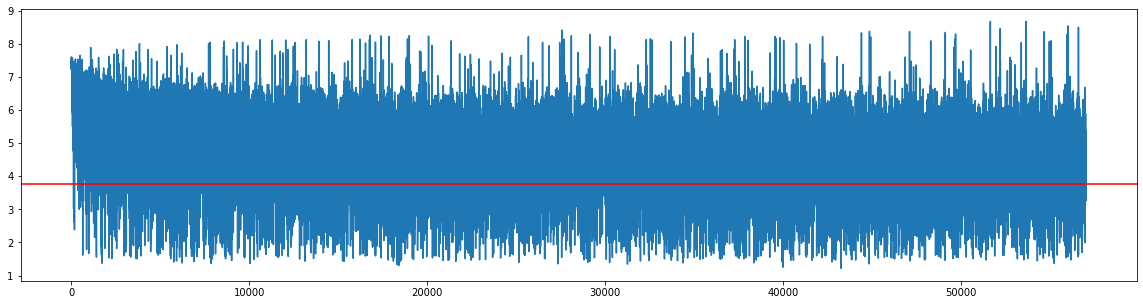

In [12]:
  plt.figure(figsize=(20,5))
  plt.plot(losses)

  # plot a horizontal line for the bigram loss
  avg_bigram_loss = np.mean(bigram_losses)
  print("avg_bigram_loss:", avg_bigram_loss)
  plt.axhline(y=avg_bigram_loss, color='r', linestyle='-')

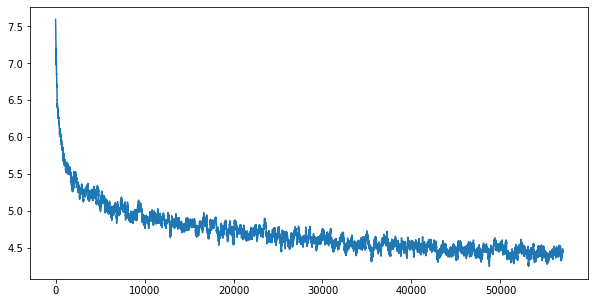

In [10]:
  # plot smoothed losses to reduce variability
  def smoothed_loss(x, decay=0.99):
    y = np.zeros(len(x))
    last = 0
    for t in range(len(x)):
      z = decay * last + (1 - decay) * x[t]
      y[t] = z / (1 - decay ** (t + 1))
      last = z
    return y
  plt.figure(figsize=(10,5))
  plt.plot(smoothed_loss(losses))
  plt.show()

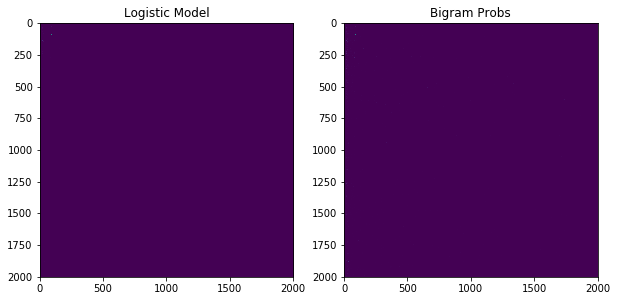

In [9]:
  # plot W and bigram probs side-by-side
  # for the most common 200 words
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.title("Logistic Model")
  plt.imshow(softmax(W))
  plt.subplot(1,2,2)
  plt.title("Bigram Probs")
  plt.imshow(bigram_probs)
  plt.show()

In [8]:
   print("time elapsed:", datetime.now() - t0)    
    

time elapsed: 2:50:29.058370
